<a href="https://colab.research.google.com/github/kimgoinghard/study-machine-learning/blob/main/study_torch_13_non_linear_activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

활성화 함수의 특징은 비선형함수라는 것이다.
인공신경망의 성능을 키우기 위해서는 은닉층을 늘리는 과정이 필요한데, 
선형함수, 즉 1차 변환 으로는 여러개의 은닉층을 추가할 수가 없다. 

예를 들자면, f(x) = Wx 라고 가정하고 은닉층으로 f(x)를 두 번 추가하면 결국  
f(f(f(x))) 가 되어 f(x) = W^3 * x 라고 둔 것과 같아진다.
따라서 활성화 함수로는 비선형함수를 사용한다. 


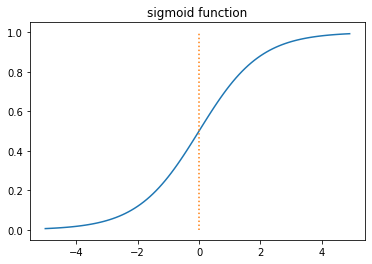

In [20]:
#sigmoid 
def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.arange(-5, 5, 0.1)
sigmoid(x)

plt.plot(x, sigmoid(x))
plt.plot([0,0],[0,1],':')
plt.title('sigmoid function')
plt.show()

인공신경망은 간단한 학습과정을 거친다. 먼저 입력에 대해 forward propagation(순전파)연산을 하고 이 결과를 토대로 계산한 예측값과 실제값으로 loss function 을 계산한다. 그리고 이 loss를 미분하여 gradient를 구하고 backward propagation을 수행하여 매개변수를 갱신하는 것이다. 

그렇기에 각 층마다의 미분값이 중요해지게되는데, 시그모이드 함수를 보면 알 수 있듯, 출력값이 0이나 1에 가까워지게되면 기울기가 0에 가까워지는 모습을 볼 수 있다. 이를 gradient vanishing 이라고 한다. 이는 역전파 과정에서 0에 가까운 기울기가 전달되어 학습에 문제가 생기게 한다. 따라서 시그모이드 함수를 은닉층에서 사용하는 것은 피하는 것이 좋다.

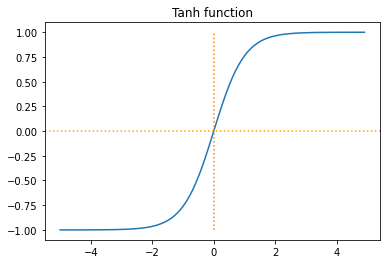

In [27]:
#hyperbolic tangent
x = np.arange(-5,5,0.1)
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[-1,1],':')
plt.axhline(y=0, color = 'orange', linestyle = ':')
plt.title('Tanh function')
plt.show()

하이퍼볼릭탄젠트 함수 또한 gradient vanishing을 겪는다. 하지만 시그모이드가 0과 1사이를 출력하는 것에 비해, -1과 1사이로 범위가 더 커서 gradient vanishing이 적은 편이다. 그래서 은닉층에선 시그모이드 보다는 사용된다.

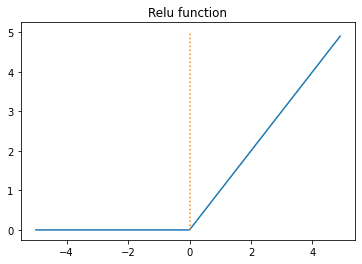

In [36]:
def relu(x):
  return np.maximum(0,x)

x = np.arange(-5,5,0.1)
y = relu(x)

plt.plot(x,y)
plt.plot([0,0],[0,5],':')
plt.title('Relu function')
plt.show()

렐루함수는 입력이 음수면 0을 양수면 그대로 반환한다. 특정 양수에 수렴하지 않아, gradient vanishing 없이 은닉층에서 시그모이드보다 잘 작동한다. 연산이 필요하지 않아 연산 속도 또한 빠르다. 

하지만 역시 문제점이 존재하는데, 입력값이 음수인 경우 0을 출력하기에, 만약 가중치의 합이 0이 되는 경우 0을 반환하게되어 해당 뉴런은 이후로 0만 출력하게되는 dying Relu현상이 발생한다.

-cs231n : Relu를 시도해보고, 그 뒤에 leakyRelu나 elu 같은 변형함수를 시도해보며, 시그모이드는 사용하지 않을 것을 권장함.

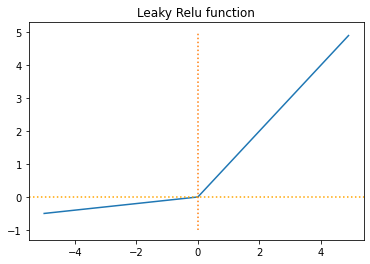

In [42]:
a = 0.1
#leaky Relu
def leaky_relu(x):
  return np.maximum(a*x, x)

x = np.arange(-5,5,0.1)
y = leaky_relu(x)
plt.plot(x,y)
plt.plot([0,0],[-1,5],':')
plt.axhline(y=0, color='orange', linestyle=":")
plt.title('Leaky Relu function')
plt.show()

Dying Relu 를 보완하기 위해 relu의 변형함수들이 등장했다. 그 중하나인 leaky relu는 음수인 경우 설정해준 아주 작은 값을 반환한다. 

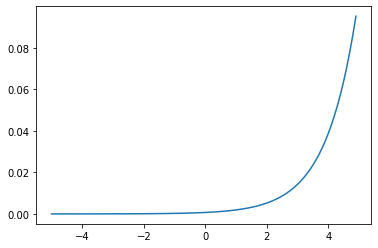

In [47]:
#softmax
x = np.arange(-5,5,0.1)
y = np.exp(x) / np.sum(np.exp(x))
plt.plot(x,y)
plt.show()

은닉층에선 relu를 주로 쓰지만 시그모이드나 소프트맥스를 쓰지 않는 것은 아니다.
분류 문제의 경우에 소프트맥스를 출력층에 자주 사용한다.




*   이진 분류 | 시그모이드 | nn.BCELOSS()
*   다중 클래스 분류 | 소프트맥스 | nn.CrossEntropyLoss()
*   회귀 | 없음 | MSE
